# Introduction:
*In this Business Analyst project, a comprehensive analysis has been conducted to derive insights from the available data. The analysis encompasses various aspects such as product performance, customer behavior, and seller income. Here's an overview of the tasks undertaken:*

1.   **Determining Seller Earnings on New Products in 2020:**
Identification and calculation of earnings from products introduced exclusively in 2020 (Novelties).

1.   **Finding Products with the Biggest Increase in 2020:** Comparing product deliveries between 2020 and 2019 to identify the item with the highest increase in deliveries.

1.  **Conducting ABC Analysis:**
Utilizing the ABC analysis method to categorize products based on their contribution to sales.
Dividing products into three categories (A, B, C) according to their sales volume percentages.

1.   **Analyzing Customer Revenue Growth in 2020:**
Examining trends in customer spending and revenue growth throughout the year.

1.   **Performing RFM Analysis:**
Segmenting customers based on Recency, Frequency, and Monetary value of their purchases to identify high-value customers.

1.   **Assessing Seller Income by Month for Seasonality:**
Analyzing seller income on a monthly basis to determine if there are any seasonal trends.

1.   **Investigating Factors Influencing Seller Income Increase:**
Identifying and analyzing factors that may have contributed to the increase in seller income.

# Project Tasks:



*   ***Task 1:*** Comparison of delivery volumes between 2019 and 2020 to identify new products introduced in 2020 and calculating the total deliveries of these novelties.
*   ***Task 2:*** Conducting a year-to-year comparison of product deliveries excluding new items to pinpoint the product with the highest increase in deliveries in 2020 compared to 2019.

*  ***Task 3:*** Performing an ABC analysis for both years to categorize products and comparing the number of unique product codes in each ABC category. Additionally, determining the total number of goods categorized as A in both 2019 and 2020.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Business Analyst (junior).xlsx to Business Analyst (junior).xlsx


In [ ]:
xlsx_file = pd.ExcelFile("/content/Business Analyst (junior).xlsx")
sheet_names = xlsx_file.sheet_names
print(sheet_names)

# Read specific sheets
df_2019 = pd.read_excel(xlsx_file, sheet_name="2019")
df_2020 = pd.read_excel(xlsx_file, sheet_name="2020")

# Print the dataframes
print(df_2019)
print(df_2020)

['2019', '2020']
     Order number  Client ID  Product code Date of delivery  Delivery amount
0         97058.0     7121.0      494843.0       2019-01-24             9565
1          2968.0     7167.0      111937.0       2019-01-29            18907
2          2968.0     7167.0      218889.0       2019-01-29            54132
3         45863.0     7136.0      495715.0       2019-02-07            28023
4         45863.0     7136.0      495716.0       2019-02-07            59120
..            ...        ...           ...              ...              ...
773           NaN        NaN           NaN              NaT            61906
774           NaN        NaN           NaN              NaT            16537
775           NaN        NaN           NaN              NaT            43292
776           NaN        NaN           NaN              NaT            34711
777           NaN        NaN           NaN              NaT            42962

[778 rows x 5 columns]
         Order number  Client ID  P

<Axes: >

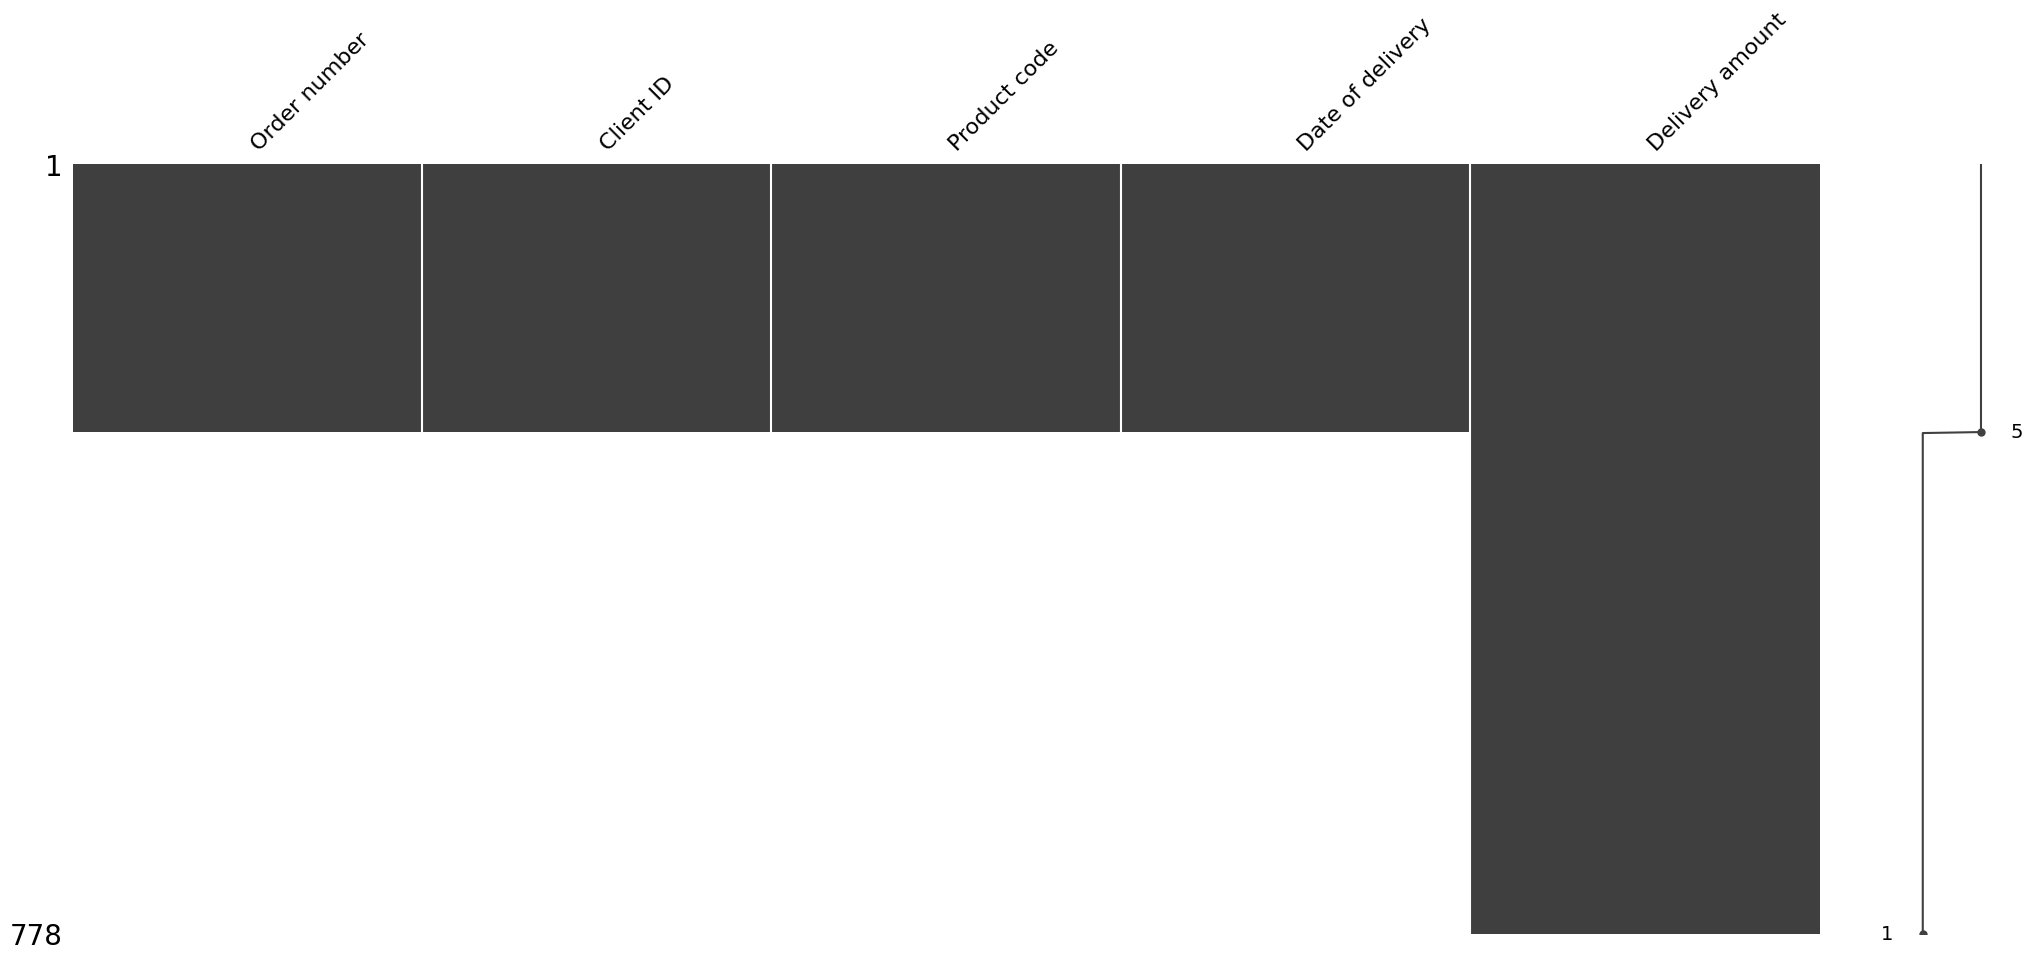

In [ ]:
msno.matrix(df_2019)

In [ ]:
df_2019 = df_2019.iloc[:271, :]
df_2019 = df_2019.astype({'Client ID':np.int32, 'Order number':np.int32, 'Product code':np.int32})
df_2019.describe()

,Order number,Client ID,Product code,Delivery amount
count,271.000000,271.000000,271.000000,271.000000
mean,40986.944649,7137.667897,446526.763838,35093.892989
std,27813.750049,18.439502,113515.037259,18974.208401
min,2968.000000,7110.000000,111864.000000,1267.000000
25%,21924.000000,7125.000000,497028.000000,18893.500000
50%,40155.000000,7135.000000,497032.000000,37466.000000
75%,50755.000000,7155.000000,497035.000000,52605.500000
max,112601.000000,7167.000000,509369.000000,65583.000000


In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048304 entries, 0 to 1048303
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Order number      507 non-null      float64       
 1   Client ID         507 non-null      float64       
 2   Product code      507 non-null      float64       
 3   Date of delivery  507 non-null      datetime64[ns]
 4   Delivery amount   1047810 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 40.0 MB


<Axes: >

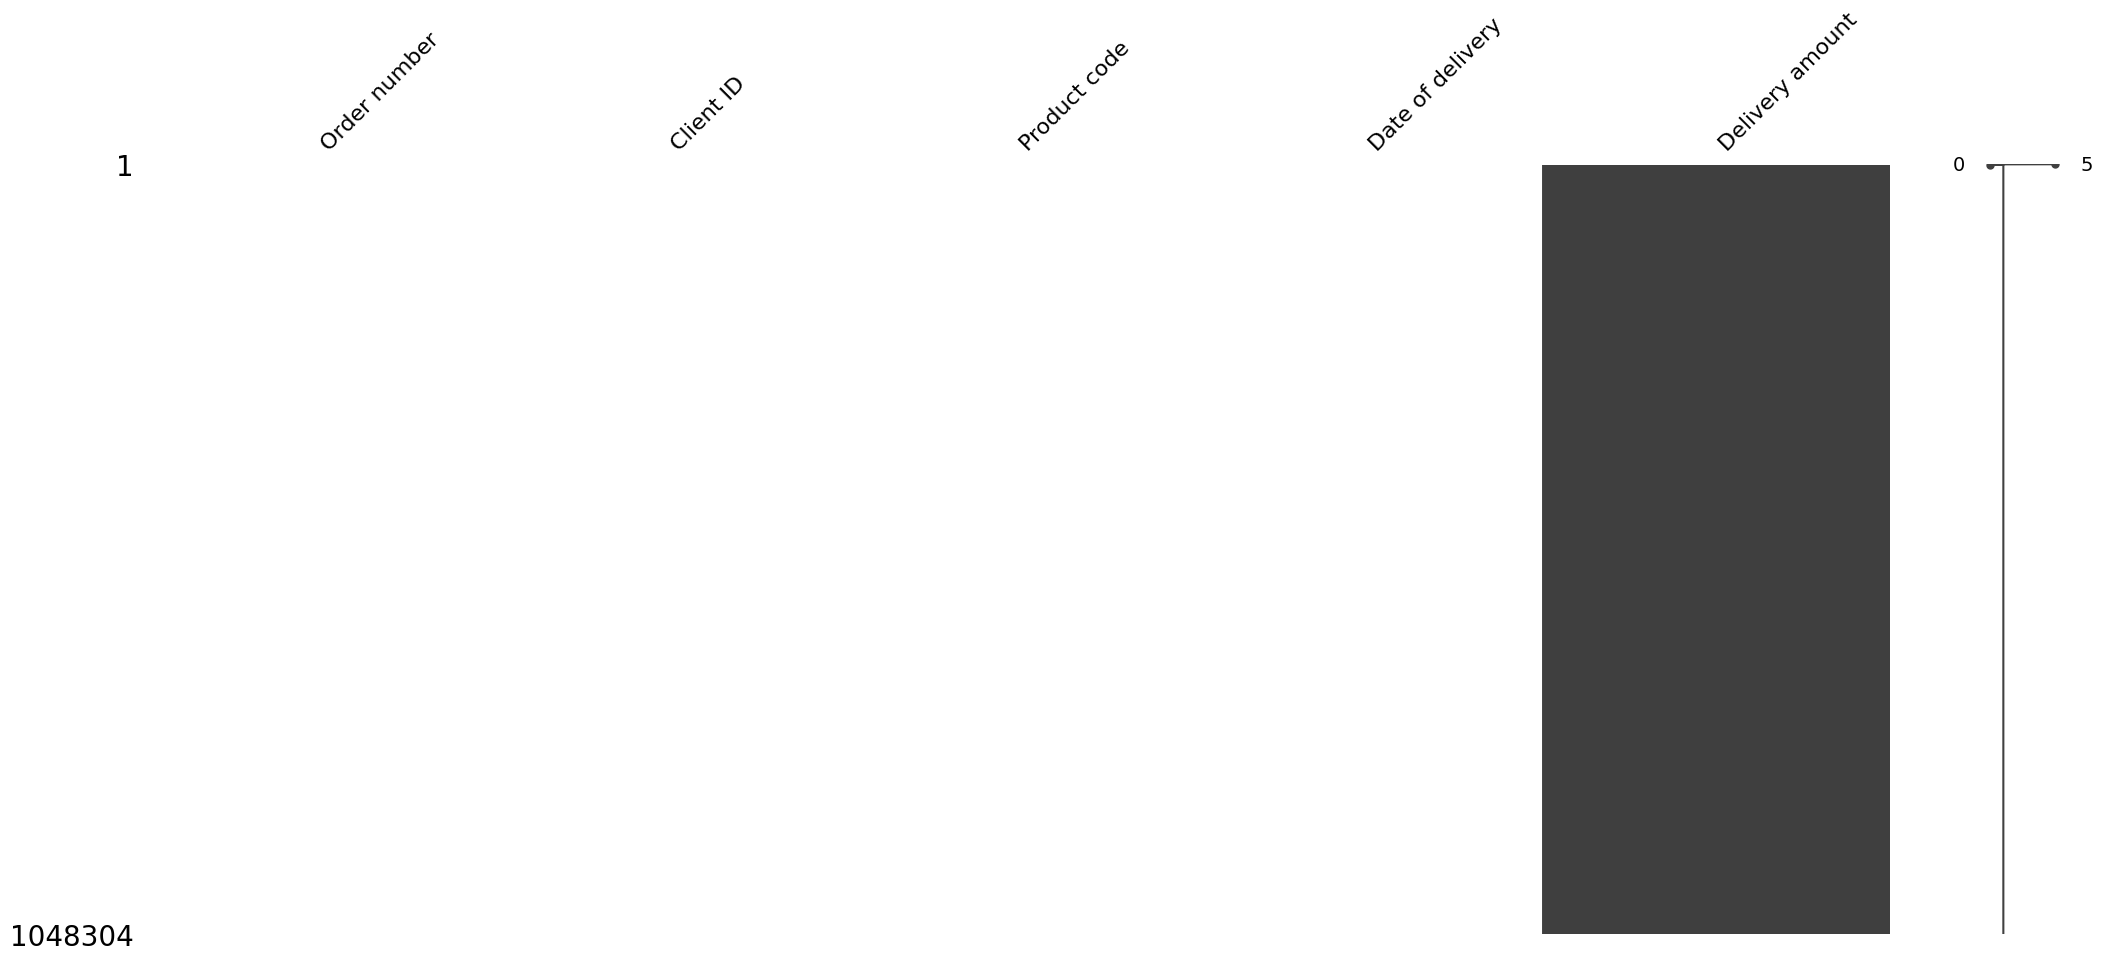

In [ ]:
msno.matrix(df_2020)

In [ ]:
df_2020 = df_2020.iloc[:507, :]
df_2020 = df_2020.astype({'Client ID':np.int32, 'Order number':np.int32, 'Product code':np.int32})
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order number      507 non-null    int32         
 1   Client ID         507 non-null    int32         
 2   Product code      507 non-null    int32         
 3   Date of delivery  507 non-null    datetime64[ns]
 4   Delivery amount   507 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 14.0 KB


In [ ]:
df_2020.describe()

,Order number,Client ID,Product code,Delivery amount
count,507.000000,507.000000,507.000000,507.000000
mean,52150.370809,7137.840237,411595.812623,33227.370809
std,29487.910887,16.089919,141994.977992,19057.057157
min,3491.000000,7110.000000,111855.000000,1308.000000
25%,33760.000000,7126.000000,237553.000000,16214.000000
50%,53061.000000,7136.000000,512016.000000,32328.000000
75%,64473.000000,7158.000000,518703.000000,50635.000000
max,130090.000000,7167.000000,524468.000000,65891.000000


In [ ]:
df_2019['Year'] = df_2019['Date of delivery'].dt.year
df_2020['Year'] = df_2020['Date of delivery'].dt.year

In [ ]:
code = df_2019['Product code'].to_list()

In [ ]:
df_2020[~df_2020['Product code'].isin(code)].agg({'Delivery amount' : 'sum'})

Delivery amount    15096275.0
dtype: float64

In [ ]:
df_2019_count = df_2019\
    .groupby('Product code', as_index=False)\
    .agg({'Delivery amount': 'sum'})

In [ ]:
df_2020_count = df_2020[df_2020['Product code'].isin(code)]\
    .groupby('Product code', as_index=False)\
    .agg({'Delivery amount': 'sum'})
growth = df_2020_count.merge(df_2019_count, left_on='Product code', \
                               right_on='Product code', suffixes=(' 2019', ' 2020'))

In [ ]:
growth = df_2020_count.merge(df_2019_count, left_on='Product code', \
                               right_on='Product code', suffixes=(' 2019', ' 2020'))

In [ ]:
growth['Growth in supplies 2020'] = growth['Delivery amount 2019'] - growth['Delivery amount 2020']

In [ ]:
growth.sort_values(by='Growth in supplies 2020', ascending=False).head(1)

,Product code,Delivery amount 2019,Delivery amount 2020,Growth in supplies 2020
32,495720,78619.0,4028,74591.0


In [ ]:
def ABC_analysis(data, a, b):
    #group data by product code, calculate the amount of deliveries and write everything to the dfsale variable
    dfsale = data.groupby(['Product code'], as_index=False)\
        .agg({'Delivery amount':'sum'})\
        .sort_values(by='Delivery amount', ascending=False)
    #create a new feature 'part' that will store the share of deliveries from the total amount
    dfsale['part'] = dfsale['Delivery amount']/dfsale['Delivery amount'].sum()*100
    #create a new feature 'cum_part' that will store the total amount of shares
    dfsale['cum_part']=dfsale['part'].cumsum()
    #create a new feature 'group' and use the lambda function to divide the products into 3 groups ABC
    #use separators so that we can choose the boundaries of the section ourselves
    result = dfsale['cum_part'].apply(lambda x: 'A' if x < a else ('B' if a <= x < b else 'C')).to_list()
    #return the list
    return result

In [ ]:
dfsale_2019 = df_2019.groupby(['Product code'], as_index=False)\
    .agg({'Delivery amount':'sum'})\
    .sort_values(by='Delivery amount', ascending=False)
#use our function to assign products to a group (incorrect at first)
dfsale_2019['abc_group'] = ABC_analysis(dfsale_2019, 50, 80)

In [ ]:
dfsale_2020 = df_2020.groupby(['Product code'], as_index=False)\
    .agg({'Delivery amount':'sum'})\
    .sort_values(by='Delivery amount', ascending=False)
dfsale_2020['abc_group'] = ABC_analysis(dfsale_2020, 50, 80)

In [ ]:
dfsale_2019['abc_group'].value_counts()

C    52
A     6
B     6
Name: abc_group, dtype: int64

In [ ]:
dfsale_2020['abc_group'].value_counts()

C    67
B    19
A    13
Name: abc_group, dtype: int64

In [ ]:
dfsale_2019['abc_group'] = ABC_analysis(dfsale_2019, 80, 95)

In [ ]:
abc_count = dfsale_2019['abc_group'].value_counts()
abc_sum = dfsale_2019.groupby('abc_group', as_index=False).agg({'Delivery amount':'sum'})

In [ ]:
dfsale_2020['abc_group'] = ABC_analysis(dfsale_2020, 80, 95)
abc_count_20 = dfsale_2020['abc_group'].value_counts()
abc_sum_20 = dfsale_2020.groupby('abc_group', as_index=False).agg({'Delivery amount':'sum'})

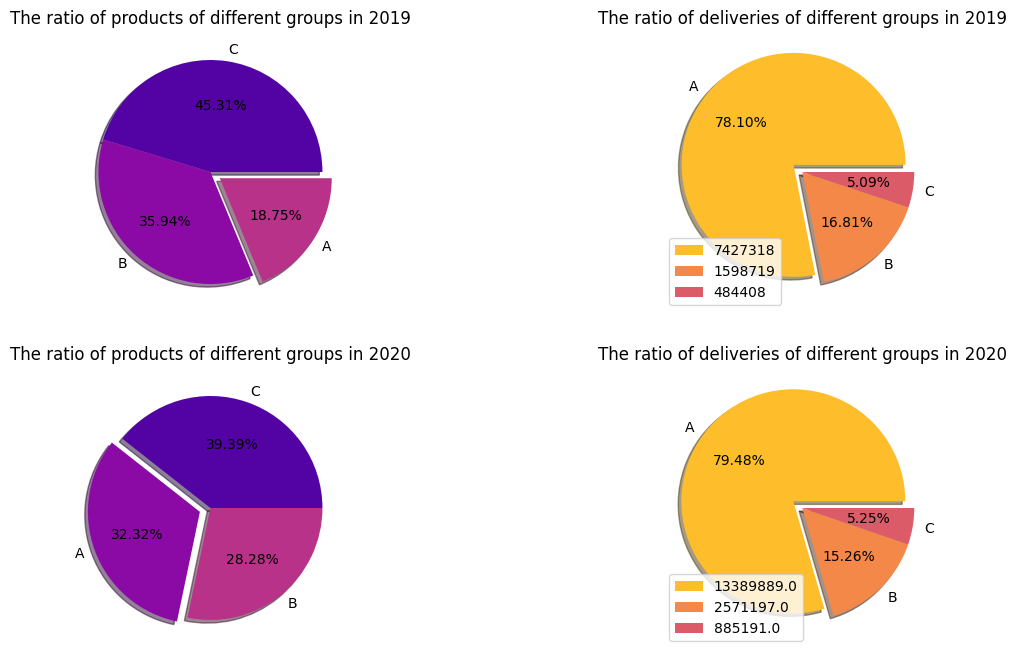

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

#2019 year
axs[0, 0].pie(x=abc_count.values, labels=abc_count.index,\
        colors=sns.color_palette('plasma'), autopct='%.2f%%',\
       explode=(0, 0, 0.1), shadow=True)
axs[0, 0].set_title('The ratio of products of different groups in 2019', fontsize=12)

axs[0, 1].pie(x=abc_sum['Delivery amount'], labels=abc_sum['abc_group'],
        colors=sns.color_palette('plasma_r'), autopct='%.2f%%',
       explode=(0.1, 0, 0), shadow=True)
axs[0, 1].set_title('The ratio of deliveries of different groups in 2019', fontsize=12)
axs[0, 1].legend(abc_sum['Delivery amount'], loc=3)

#2020 year
axs[1, 0].pie(x=abc_count_20.values, labels=abc_count_20.index,\
        colors=sns.color_palette('plasma'), autopct='%.2f%%',\
       explode=(0, 0.1, 0), shadow=True)
axs[1, 0].set_title('The ratio of products of different groups in 2020', fontsize=12)

axs[1, 1].pie(x=abc_sum_20['Delivery amount'], labels=abc_sum_20['abc_group'],
        colors=sns.color_palette('plasma_r'), autopct='%.2f%%',
       explode=(0.1, 0, 0), shadow=True)
axs[1, 1].set_title('The ratio of deliveries of different groups in 2020', fontsize=12)
axs[1, 1].legend(abc_sum_20['Delivery amount'], loc=3)


plt.show()

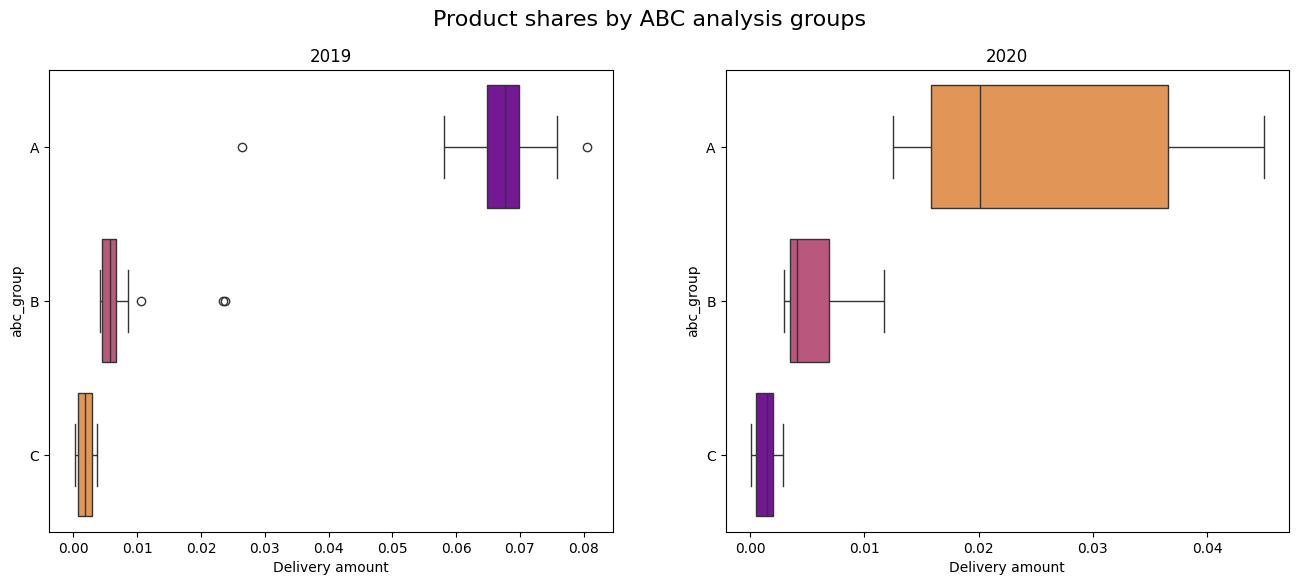

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle('Product shares by ABC analysis groups', fontsize=16)
sns.boxplot(x=dfsale_2019['Delivery amount']/dfsale_2019['Delivery amount']\
            .sum(), ax=axs[0], palette='plasma', y=dfsale_2019['abc_group'])
sns.boxplot(x=dfsale_2020['Delivery amount']/dfsale_2020['Delivery amount']\
            .sum(), ax=axs[1], palette='plasma_r', y=dfsale_2020['abc_group'])
axs[0].title.set_text('2019')
axs[1].title.set_text('2020')
plt.show()

In [ ]:
AGroup_2019 = dfsale_2019.loc[dfsale_2019['abc_group']=='A', 'Product code'].to_list()
AGroup_2019 = pd.DataFrame(AGroup_2019, columns=['Product code'])
AGroupCode = AGroup_2019[~AGroup_2019['Product code'].isin(df_2020['Product code'].to_list())]
AGroupCode = AGroupCode['Product code'].to_list()

In [ ]:
AGroupSum = df_2019[df_2019['Product code'].isin(AGroupCode)]['Delivery amount'].sum()
AGroupSum

3791398

In [ ]:
AGroupSum / df_2019['Delivery amount'].sum()*100

39.86562142991206

In [ ]:
AGroupCodeSup = AGroup_2019[AGroup_2019['Product code'].isin(df_2020['Product code'].to_list())]

In [ ]:
AGroupSumSup = df_2020[df_2020['Product code']\
                         .isin(AGroupCodeSup['Product code'].to_list())]\
                         .agg({'Delivery amount': 'sum'})
AGroupSumSup

Delivery amount    506094.0
dtype: float64

In [ ]:
AGroupSumSup / df_2020['Delivery amount'].sum()*100

Delivery amount    3.004189
dtype: float64

In [ ]:
len(df_2020['Product code'].value_counts()) - len(df_2019['Product code'].value_counts())

35

In [ ]:
sum_new_2020 = df_2020[~df_2020['Product code'].isin(code)]['Delivery amount'].sum()

In [ ]:
sum_new_2020/dfsale_2020['Delivery amount'].sum()*100

89.61193621593662

In [ ]:
sum_new_2020

15096275.0

In [ ]:
BCCode = dfsale_2019.loc[dfsale_2019['abc_group']\
                         .isin(['B', 'C']), 'Product code'].to_list()

In [ ]:
dfsale_2019[dfsale_2019['abc_group'].isin(['B', 'C'])].count()

Product code       52
Delivery amount    52
abc_group          52
dtype: int64

In [ ]:
dfsale_2020[dfsale_2020['Product code'].isin(BCCode)].count()

Product code       36
Delivery amount    36
abc_group          36
dtype: int64

In [ ]:
dfsale_2020[dfsale_2020['Product code'].isin(BCCode)]['abc_group'].unique()

array(['B', 'C'], dtype=object)

In [ ]:
dfsale_2019[dfsale_2019['Product code'].isin(BCCode)]['Delivery amount'].sum()


2083127

In [ ]:
dfsale_2020[dfsale_2020['Product code'].isin(BCCode)]['Delivery amount'].sum()

1243908.0

In [ ]:
(dfsale_2020[dfsale_2020['Product code'].isin(BCCode)]['Delivery amount'].sum()/\
dfsale_2019[dfsale_2019['Product code'].isin(BCCode)]['Delivery amount'].sum())*100-100

-40.286501975155616

In [ ]:
data = df_2019[df_2019['Product code'].isin(code)]\
    .merge(df_2020[df_2020['Product code'].isin(code)], left_on='Product code', right_on='Product code')\
    .groupby('Product code', as_index=False)\
    .agg({'Delivery amount_x':'sum', 'Delivery amount_y':'sum'})

In [ ]:
data['outsiders'] = data['Delivery amount_y'] - data['Delivery amount_x']

In [ ]:
data[data['outsiders'] < 0].sort_values(by='outsiders')

,Product code,Delivery amount_x,Delivery amount_y,outsiders
36,497030,633412,87156.0,-546256.0
41,509369,225770,14850.0,-210920.0
37,497032,621724,440316.0,-181408.0
28,495716,118240,61756.0,-56484.0
8,178668,55429,1335.0,-54094.0
16,218988,54915,2727.0,-52188.0
6,167346,52734,4338.0,-48396.0
23,241129,64893,19092.0,-45801.0
29,495717,45829,1652.0,-44177.0
13,217825,22065,1891.0,-20174.0


In [ ]:
shop_2019 = df_2019.groupby(['Client ID'], as_index=False)\
    .agg({'Delivery amount':'sum', 'Date of delivery':'count'})\
    .sort_values(by='Delivery amount', ascending=False)
shop_2019

,Client ID,Delivery amount,Date of delivery
20,7167,1394776,46
12,7136,879094,24
6,7126,609863,14
3,7118,594290,13
19,7161,500806,13
1,7111,495917,11
7,7128,481214,11
8,7129,478618,12
4,7121,469834,14
10,7134,454521,13


In [ ]:
shop_2020 = df_2020.groupby(['Client ID'], as_index=False)\
    .agg({'Delivery amount':'sum', 'Date of delivery':'count'})\
    .sort_values(by='Delivery amount', ascending=False)
shop_2020

,Client ID,Delivery amount,Date of delivery
18,7158,2035274.0,66
10,7134,1479166.0,41
19,7161,1421475.0,39
12,7136,1296929.0,41
6,7126,1105069.0,32
3,7118,1082123.0,31
4,7121,797343.0,23
15,7140,737001.0,17
20,7167,712610.0,23
16,7146,687517.0,22


In [ ]:
sales_to_shops = shop_2019.merge(shop_2020, left_on='Client ID', right_on='Client ID', suffixes=('_2019', '_2020'))
sales_to_shops['Delivery amount increase'] = sales_to_shops['Delivery amount_2020'] - sales_to_shops['Delivery amount_2019']

In [ ]:
sales_to_shops['Growth of delivery amount %'] = \
    (sales_to_shops['Delivery amount_2020']/sales_to_shops['Delivery amount_2019'])* 100 - 100
sales_to_shops.sort_values(by=['Delivery amount increase'], ascending=False)

,Client ID,Delivery amount_2019,Date of delivery_2019,Delivery amount_2020,Date of delivery_2020,Delivery amount increase,Growth of delivery amount %
18,7158,218986,6,2035274.0,66,1816288.0,829.408273
9,7134,454521,13,1479166.0,41,1024645.0,225.434028
4,7161,500806,13,1421475.0,39,920669.0,183.837454
19,7140,50208,2,737001.0,17,686793.0,1367.895554
20,7135,41474,2,566693.0,17,525219.0,1266.381347
2,7126,609863,14,1105069.0,32,495206.0,81.199548
3,7118,594290,13,1082123.0,31,487833.0,82.086692
1,7136,879094,24,1296929.0,41,417835.0,47.530184
17,7139,281316,11,652626.0,17,371310.0,131.990360
15,7138,323719,11,673481.0,26,349762.0,108.044940


In [ ]:
data = pd.concat([df_2019, df_2020])
#date of last delivery
last_delivery = data.groupby('Client ID', as_index=False).agg({'Date of delivery':'max'})
#now add the last purchase date to this dataset
RFM = sales_to_shops.merge(last_delivery, left_on='Client ID', right_on='Client ID')
#Rename the columns to better match the stored values
RFM = RFM.rename(columns={'Date of delivery': 'Last Delivery Date', \
                          'Date of delivery_2019' : 'Deliveries in 2019',\
                          'Date of delivery_2020' : 'Deliveries in 2020'})
#calculate the amount of supplies for 2 years for each store
RFM['Delivery amount'] = RFM['Delivery amount_2019'] + RFM['Delivery amount_2020']
#calculate the number of deliveries for 2 years for each client
RFM['Frequency of deliveries'] = RFM['Deliveries in 2019'] + RFM['Deliveries in 2020']
#remove unnecessary features
RFM = RFM.drop(['Delivery amount_2019', 'Delivery amount_2020', 'Deliveries in 2019', 'Deliveries in 2020'], axis=1)
#count how many days have passed since the last delivery (date 2021-01-01 is conditional)
RFM['Recent'] = 0
RFM['Current date'] = '2021-01-01'
RFM['Current date']=pd.to_datetime(RFM['Current date'], format='%Y-%m-%d')
RFM['Late Date'] = RFM['Current date'] - RFM['Last Delivery Date']
# leave only the required columns
RFM_analisys = RFM[['Client ID', 'Delivery amount increase', 'Growth of delivery amount %', \
                    'Late Date', 'Frequency of deliveries', 'Delivery amount']]
pd.set_option('display.float_format', lambda x: '%.1f' % x)
RFM_analisys.describe()

,Client ID,Delivery amount increase,Growth of delivery amount %,Late Date,Frequency of deliveries,Delivery amount
count,21.0,21.0,21.0,21,21.0,21.0
mean,7134.4,349325.3,215.0,72 days 18:17:08.571428571,37.0,1255082.0
std,16.1,502958.1,408.7,46 days 00:54:36.661713827,16.7,549186.9
min,7110.0,-682166.0,-48.9,8 days 00:00:00,19.0,608167.0
25%,7125.0,95765.0,20.3,29 days 00:00:00,24.0,850274.0
50%,7134.0,327509.0,69.7,72 days 00:00:00,30.0,997200.0
75%,7140.0,495206.0,132.0,107 days 00:00:00,46.0,1714932.0
max,7167.0,1816288.0,1367.9,149 days 00:00:00,72.0,2254260.0


In [ ]:
RFM_analisys['Late Date'] = RFM_analisys['Late Date'].dt.days
RFM_analisys['Recency'] = RFM_analisys['Late Date']\
        .apply(lambda x: 3 if x <= 29 else (2 if 29 < x <=72 else 1))
RFM_analisys['Frequency'] = RFM_analisys['Frequency of deliveries']\
        .apply(lambda x: 3 if x <= 46 else (2 if 30 <= x <=46 else 1))
RFM_analisys['Monetary'] = RFM_analisys['Delivery amount'].\
        apply(lambda x: 3 if x >= 1714932 else (2 if 997200 <= x <1714932 else 1))
RFM_analisys = RFM_analisys[['Client ID', 'Delivery amount increase', \
                             'Growth of delivery amount %', 'Recency', 'Frequency', 'Monetary']]
RFM_analisys

,Client ID,Delivery amount increase,Growth of delivery amount %,Recency,Frequency,Monetary
0,7167,-682166.0,-48.9,3,1,3
1,7136,417835.0,47.5,1,1,3
2,7126,495206.0,81.2,3,3,3
3,7118,487833.0,82.1,2,3,2
4,7161,920669.0,183.8,2,1,3
5,7111,-156860.0,-31.6,1,3,1
6,7128,97885.0,20.3,3,3,2
7,7129,-78181.0,-16.3,2,3,1
8,7121,327509.0,69.7,3,3,2
9,7134,1024645.0,225.4,3,1,3


In [ ]:
def RFM_loyalty(r, f, m):
    temp = list()
    for i in range(len(r)):
        if r[i] == 1:
            if f[i] == 1:
                temp.append('Lost')
            else:
                temp.append('Loyal customers who have lost activity')
        elif r[i] == 2:
            if 1<=f[i]<=2:
                temp.append('Sleeping')
            else:
                temp.append('loyal sleeping customers')
        else:
            if f[i] == 1:
                temp.append('Beginners')
            elif f[i] == 2:
                temp.append('Developing')
            else:
                temp.append('Regular customers')
    return temp
#create a new feature Loyalty, which we will fill using the RFM_loyalty function
RFM_analisys['Loyalty'] = RFM_loyalty(RFM_analisys.loc[:, 'Recency'], \
                                        RFM_analisys.loc[:, 'Frequency'], RFM_analisys.loc[:, 'Monetary'])
RFM_analisys.groupby('Loyalty', as_index=False)\
    .agg({'Client ID':'count', 'Delivery amount increase': 'sum', 'Growth of delivery amount %': 'median'})\
    .sort_values(by='Delivery amount increase', ascending=False)

,Loyalty,Client ID,Delivery amount increase,Growth of delivery amount %
1,Lost,2,2234123.0,438.5
5,loyal sleeping customers,4,1446207.0,95.1
2,Loyal customers who have lost activity,8,1422002.0,33.0
3,Regular customers,4,970352.0,45.0
4,Sleeping,1,920669.0,183.8
0,Beginners,2,342479.0,88.3


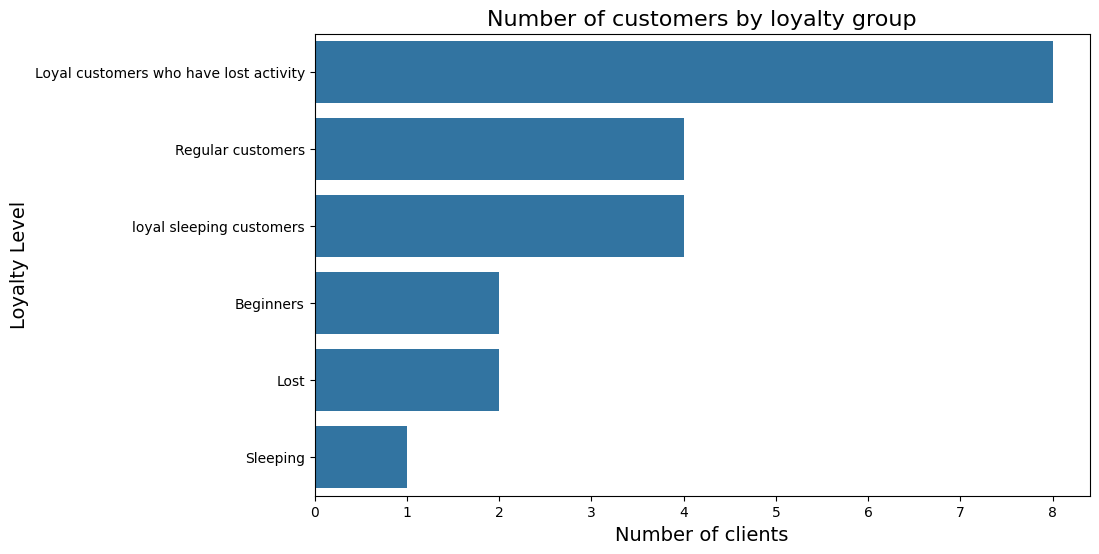

In [ ]:
loyalty_groups=RFM_analisys['Loyalty'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=loyalty_groups.values, y=loyalty_groups.index)
plt.title('Number of customers by loyalty group', fontsize=16)
plt.xlabel('Number of clients', fontsize=14)
plt.ylabel('Loyalty Level', fontsize=14)
plt.show()

In [ ]:
RFM_analisys.sort_values(by='Delivery amount increase', ascending=False)

,Client ID,Delivery amount increase,Growth of delivery amount %,Recency,Frequency,Monetary,Loyalty
18,7158,1816288.0,829.4,1,1,3,Lost
9,7134,1024645.0,225.4,3,1,3,Beginners
4,7161,920669.0,183.8,2,1,3,Sleeping
19,7140,686793.0,1367.9,2,3,1,loyal sleeping customers
20,7135,525219.0,1266.4,1,3,1,Loyal customers who have lost activity
2,7126,495206.0,81.2,3,3,3,Regular customers
3,7118,487833.0,82.1,2,3,2,loyal sleeping customers
1,7136,417835.0,47.5,1,1,3,Lost
17,7139,371310.0,132.0,1,3,1,Loyal customers who have lost activity
15,7138,349762.0,108.0,2,3,2,loyal sleeping customers


In [ ]:
df_2019['Month'] = df_2019['Date of delivery'].dt.month
df_2020['Month'] = df_2020['Date of delivery'].dt.month
#a way to group our data via groupby
pivot_2019 = df_2019.groupby('Month', as_index=False).agg({'Delivery amount':['mean', 'median']})
pivot_2019

Month Delivery amount        
                    mean  median
0      1         27534.7 18907.0
1      2         35677.3 37466.0
2      3         40689.6 40826.0
3      4         27219.5 22065.0
4      5         36439.7 40694.0
5      6         20957.0 17516.0
6      7         54915.0 54915.0
7      8         64893.0 64893.0
8      9         26639.5 26639.5
9     10         31758.7 36369.0
10    12         33727.5 42597.0

In [ ]:
pivot_2020 = pd.pivot_table(df_2020, index=['Month'], aggfunc={'Delivery amount': [np.mean, np.median],}).reset_index()
pivot_2020

Month Delivery amount        
                    mean  median
0      1         32778.1 35503.0
1      2         35710.6 36301.0
2      3         30658.2 28194.5
3      4         30762.8 27543.5
4      5         26953.3 21949.0
5      6         35113.9 33641.5
6      7         37143.3 36527.0
7      8         37086.2 38005.0
8      9         30524.9 27851.0
9     10         28993.6 26952.0
10    11         52318.0 52318.0
11    12         32221.3 32666.5

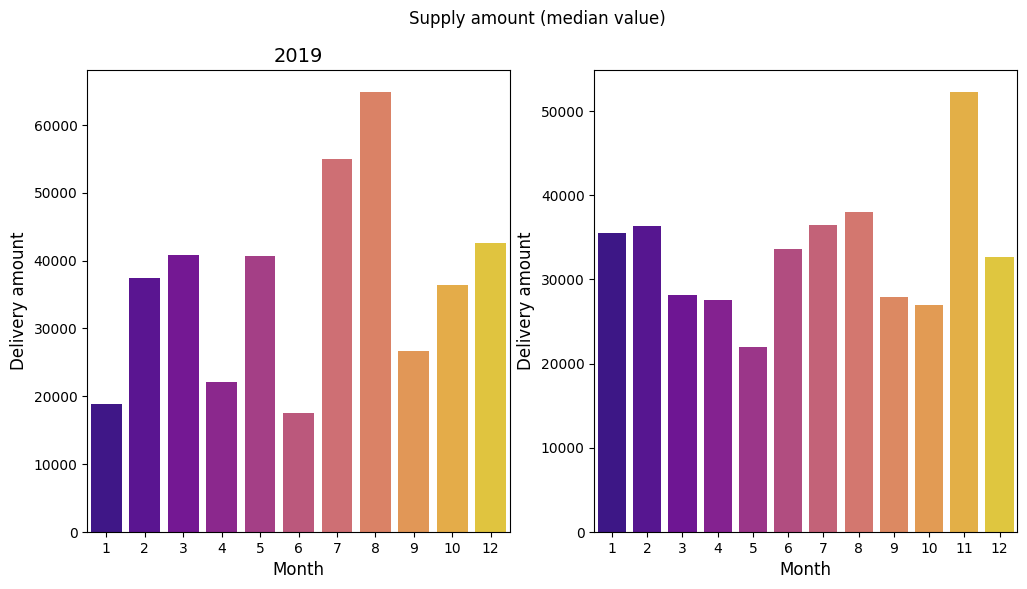

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Supply amount (median value)')
sns.barplot(x=pivot_2019['Month'], y=pivot_2019['Delivery amount', 'median'], ax=axs[0], palette='plasma')
axs[0].set_title('2019', fontsize=14)
axs[0].set_ylabel('Delivery amount', fontsize=12)
axs[0].set_xlabel('Month', fontsize=12)
sns.barplot(x=pivot_2020['Month'], y=pivot_2020['Delivery amount', 'median'], ax=axs[1], palette='plasma')
axs[1].set_ylabel('Delivery amount', fontsize=12)
axs[1].set_xlabel('Month', fontsize=12)
plt.show()


In [ ]:
df_2019.describe()

,Order number,Client ID,Product code,Delivery amount,Year,Month
count,271.0,271.0,271.0,271.0,271.0,271.0
mean,40986.9,7137.7,446526.8,35093.9,2019.0,3.4
std,27813.8,18.4,113515.0,18974.2,0.0,2.9
min,2968.0,7110.0,111864.0,1267.0,2019.0,1.0
25%,21924.0,7125.0,497028.0,18893.5,2019.0,2.0
50%,40155.0,7135.0,497032.0,37466.0,2019.0,2.0
75%,50755.0,7155.0,497035.0,52605.5,2019.0,3.0
max,112601.0,7167.0,509369.0,65583.0,2019.0,12.0


In [ ]:
df_2020.describe()

,Order number,Client ID,Product code,Delivery amount,Year,Month
count,507.0,507.0,507.0,507.0,507.0,507.0
mean,52150.4,7137.8,411595.8,33227.4,2020.0,5.2
std,29487.9,16.1,141995.0,19057.1,0.0,2.6
min,3491.0,7110.0,111855.0,1308.0,2020.0,1.0
25%,33760.0,7126.0,237553.0,16214.0,2020.0,3.0
50%,53061.0,7136.0,512016.0,32328.0,2020.0,6.0
75%,64473.0,7158.0,518703.0,50635.0,2020.0,7.0
max,130090.0,7167.0,524468.0,65891.0,2020.0,12.0


In [ ]:
median_sum_2019 = df_2019.groupby(['Month'], as_index=False).agg({'Delivery amount':'median', 'Date of delivery':'count'})
#add in 2019 the data for November by the median of the year
median_sum_2019 = median_sum_2019.append({'Month':11, 'Delivery amount': 37466.0, 'Date of delivery': 15}, ignore_index=True)
median_sum_2020 = df_2020.groupby('Month', as_index=False).agg({'Delivery amount':'median', 'Date of delivery':'count'})
#adding a new feature "Price of one delivery"
median_sum_2019['Price of one delivery'] = median_sum_2019['Delivery amount'] / median_sum_2019['Date of delivery']
median_sum_2019

,Month,Delivery amount,Date of delivery,Price of one delivery
0,1.0,18907.0,3.0,6302.3
1,2.0,37466.0,187.0,200.4
2,3.0,40826.0,19.0,2148.7
3,4.0,22065.0,17.0,1297.9
4,5.0,40694.0,9.0,4521.6
5,6.0,17516.0,3.0,5838.7
6,7.0,54915.0,1.0,54915.0
7,8.0,64893.0,1.0,64893.0
8,9.0,26639.5,2.0,13319.8
9,10.0,36369.0,11.0,3306.3


In [ ]:
median_sum_2020['Price of one delivery'] = median_sum_2020['Delivery amount'] / median_sum_2020['Date of delivery']
median_sum_2020

,Month,Delivery amount,Date of delivery,Price of one delivery
0,1,35503.0,31,1145.3
1,2,36301.0,56,648.2
2,3,28194.5,48,587.4
3,4,27543.5,90,306.0
4,5,21949.0,24,914.5
5,6,33641.5,118,285.1
6,7,36527.0,51,716.2
7,8,38005.0,33,1151.7
8,9,27851.0,10,2785.1
9,10,26952.0,39,691.1


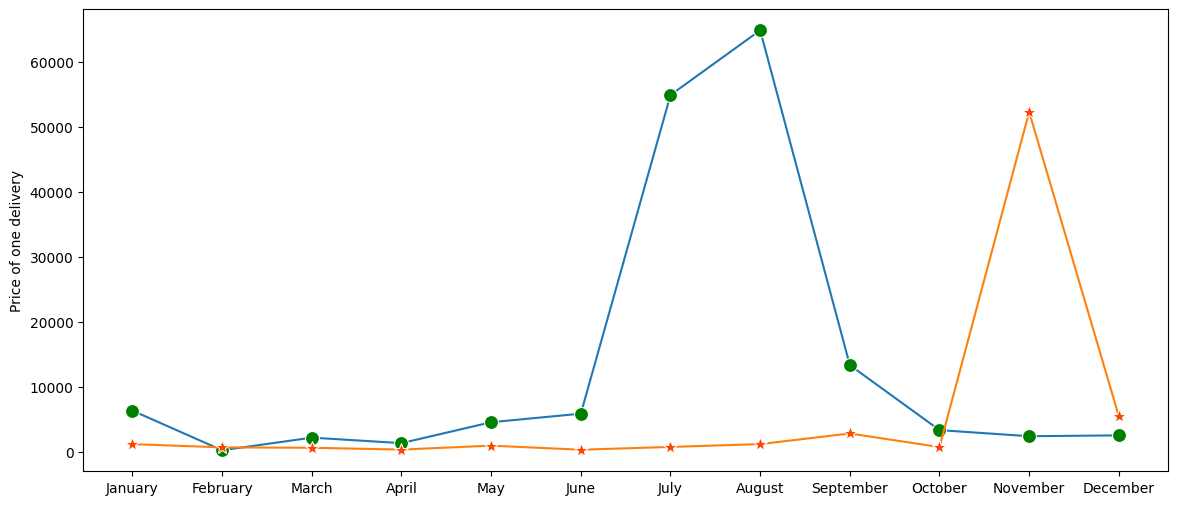

In [ ]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
plt.figure(figsize=(14, 6))
sns.lineplot(y = median_sum_2019['Price of one delivery'], x=month, marker='o', markerfacecolor='green', markersize=10)
sns.lineplot(median_sum_2020['Price of one delivery'], marker='*', markerfacecolor='orangered', markersize=10)
plt.show()

In [ ]:
median_sum_2019.describe()

,Month,Delivery amount,Date of delivery,Price of one delivery
count,12.0,12.0,12.0,12.0
mean,6.5,36696.1,23.8,13467.3
std,3.6,14128.2,51.9,22056.0
min,1.0,17516.0,1.0,200.4
25%,3.8,25495.9,2.8,2312.1
50%,6.5,37466.0,10.0,3913.9
75%,9.2,41268.8,17.2,8056.7
max,12.0,64893.0,187.0,64893.0


In [ ]:
median_sum_2020.describe()

,Month,Delivery amount,Date of delivery,Price of one delivery
count,12.0,12.0,12.0,12.0
mean,6.5,33121.0,42.2,5582.8
std,3.6,7782.6,34.3,14789.3
min,1.0,21949.0,1.0,285.1
25%,3.8,27774.1,20.5,633.0
50%,6.5,33154.0,36.0,815.4
75%,9.2,36357.5,52.2,1560.0
max,12.0,52318.0,118.0,52318.0


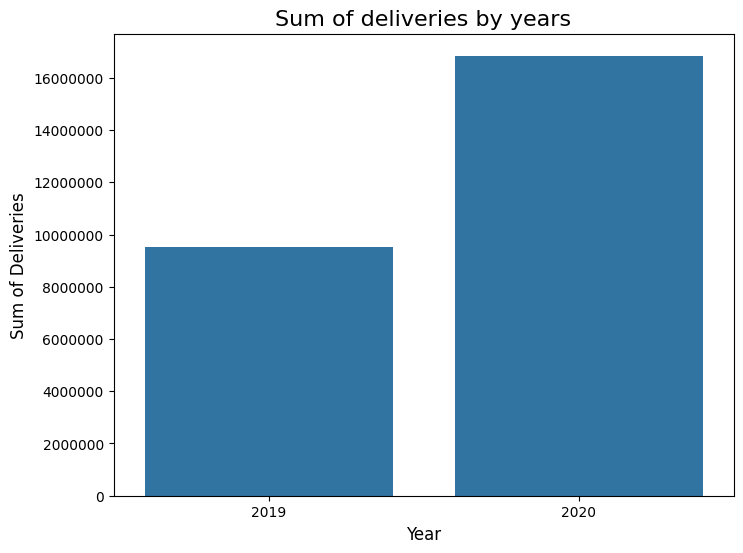

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x = ['2019', '2020'], y=[df_2019['Delivery amount'].sum(), df_2020['Delivery amount'].sum()])
plt.title("Sum of deliveries by years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sum of Deliveries", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()